**6.1. Building a RAG system with LangChain**

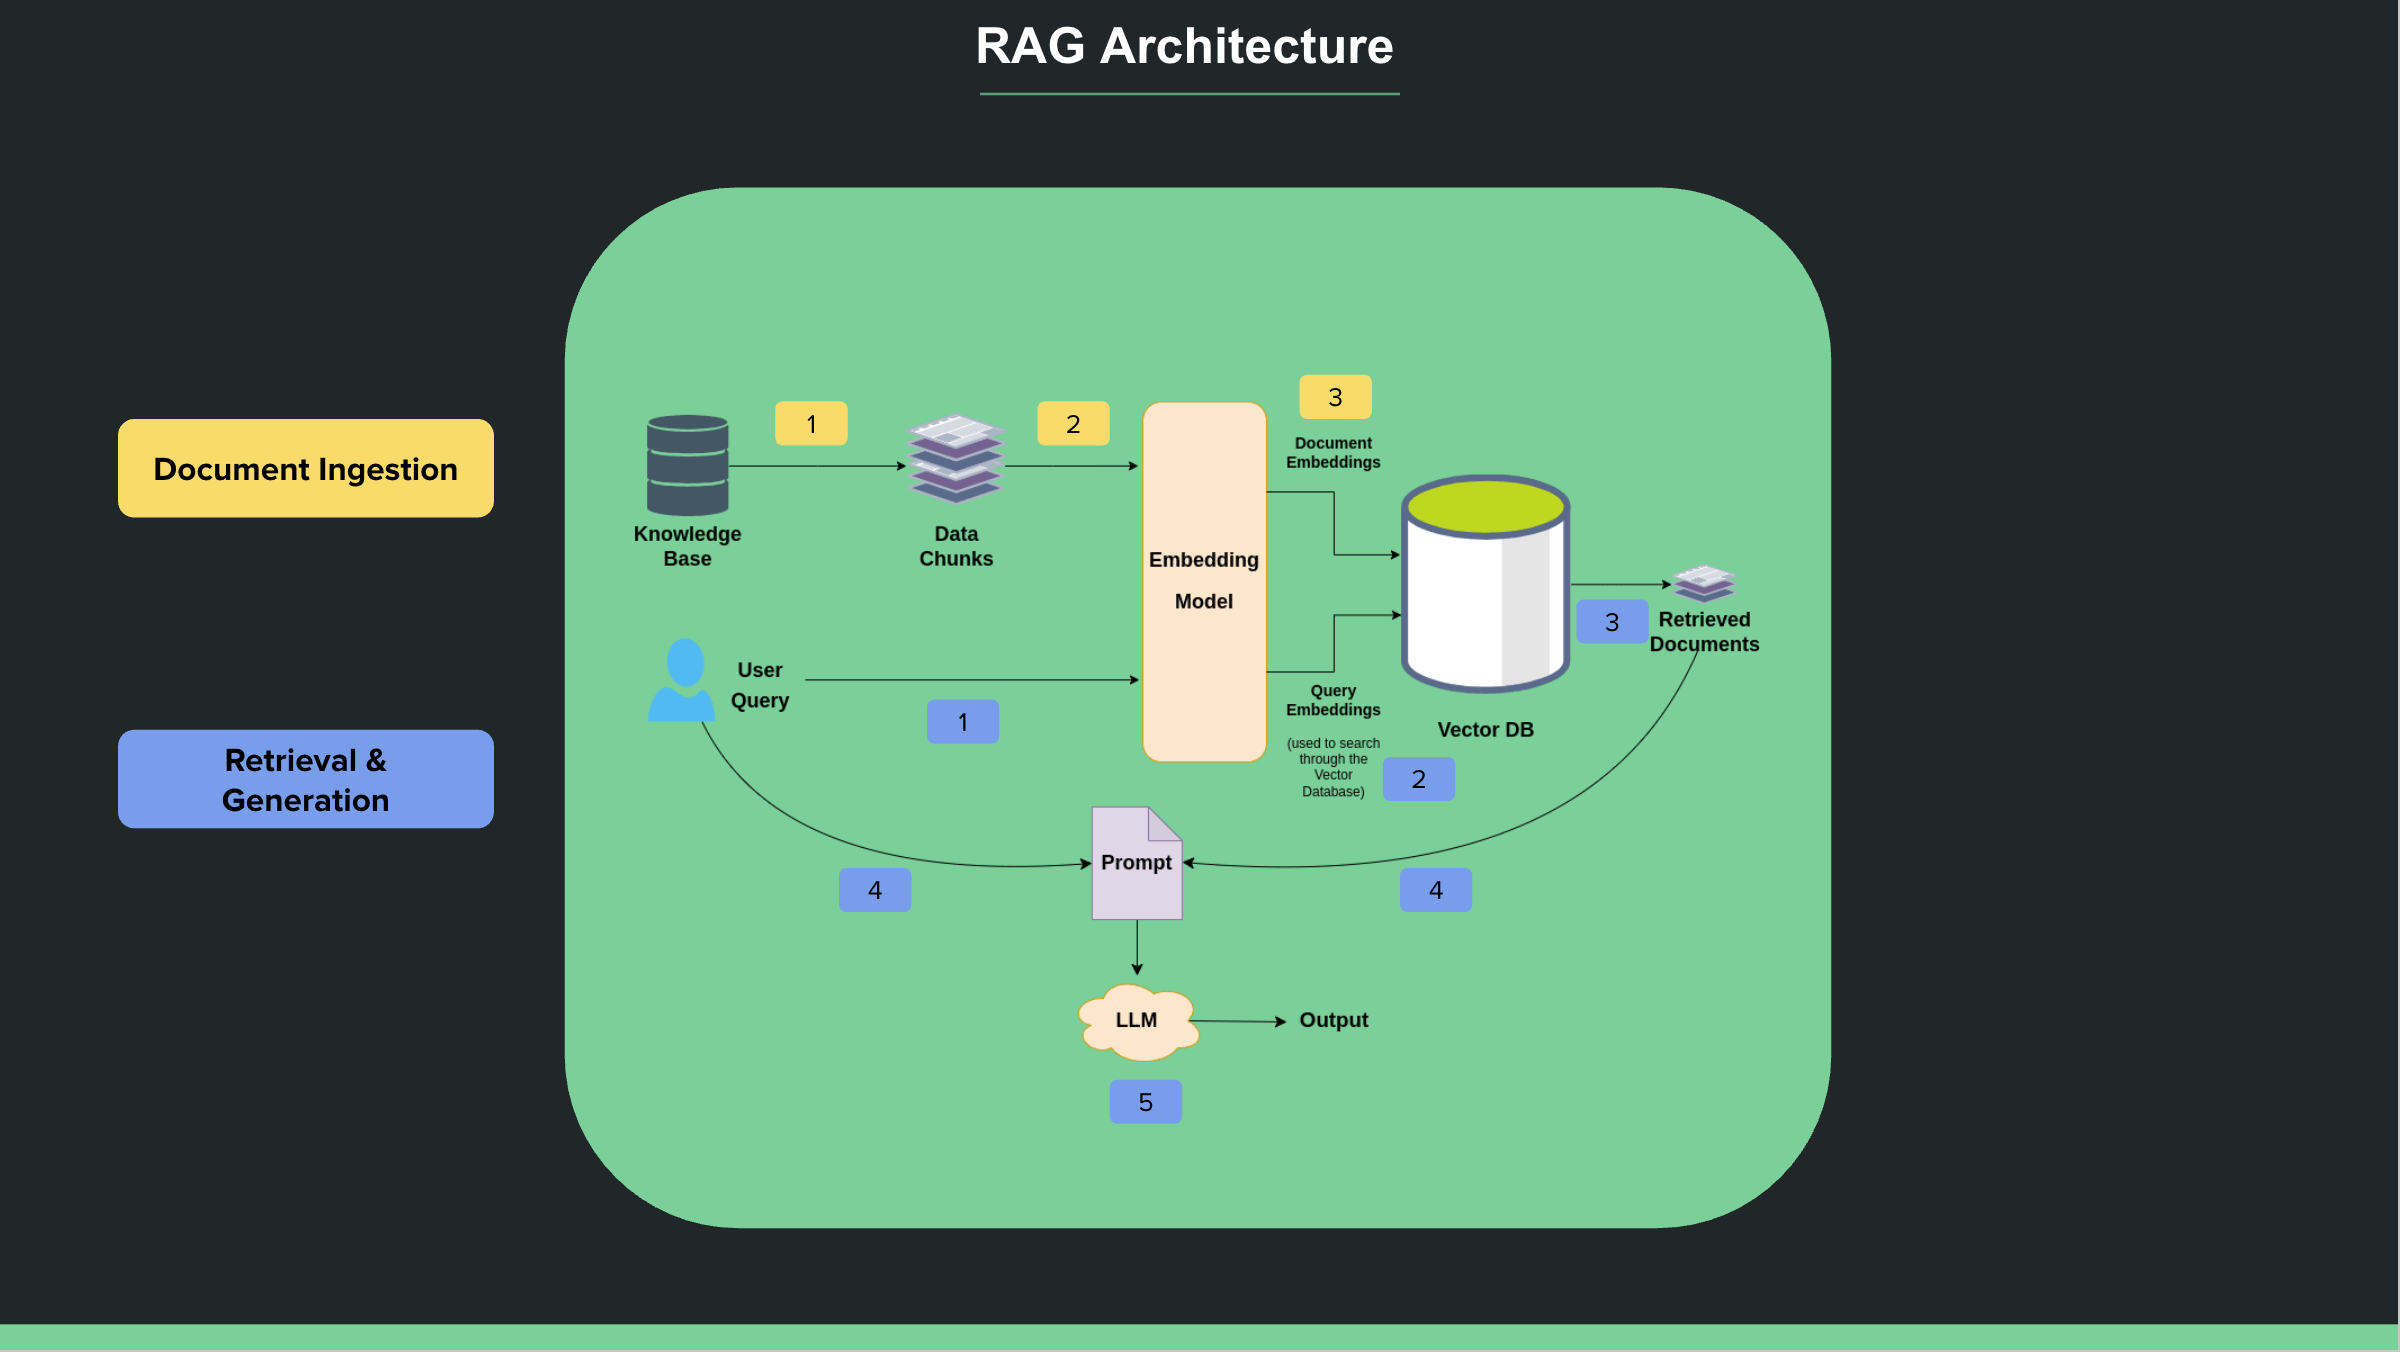

**Document Ingestion**

In [1]:
!ls

6_2_1_langchain_rag_doc_ingestion.ipynb docs_dir
6_2_2_langchain_rag_retrieval.ipynb     requirements.txt


**NOTE:** Added `langchain-classic` to `requirements`.txt as langchain is revamped. `RetrievalQA` moved to `langchain-classic` that will be used in the next notebook.

In [2]:
!pip install -q -r requirements.txt


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


**Importing the dependencies**

In [3]:
from langchain_community.document_loaders import DirectoryLoader, UnstructuredFileLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_chroma import Chroma

/Volumes/MyDrive/3_udemy/1_gen_ai_bonus/fix_code/6.2. RAG with LangChain/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import nltk
import ssl
   
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /Users/sid/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
# import nltk
# nltk.download("punkt_tab")

**To do:**
- Install Poppler
- Install Tesseract

In [5]:
!pwd

/Volumes/MyDrive/3_udemy/1_gen_ai_bonus/fix_code/6.2. RAG with LangChain


In [7]:
# configuration
docs_dir_path = "/Volumes/MyDrive/3_udemy/1_gen_ai_bonus/fix_code/6.2. RAG with LangChain/docs_dir"
vector_db_path = "/Volumes/MyDrive/3_udemy/1_gen_ai_bonus/fix_code/6.2. RAG with LangChain/vector_db"
collection_name  = "document_collection"

In [8]:
# loading the embedding model
embedding = HuggingFaceEmbeddings()

In [9]:
# directory loader
loader = DirectoryLoader(
    path=docs_dir_path,
    glob="./*.pdf",
    loader_cls=UnstructuredFileLoader
)

# single file can also be loaded with UnstructuredFileLoader

In [10]:
# load the documents
documents = loader.load()

In [12]:
print(type(documents))

<class 'list'>


In [13]:
len(documents)

2

In [14]:
# print(documents[0])

In [15]:
# initializing the text splitter
text_splitter = CharacterTextSplitter(
    chunk_size=2000,
    chunk_overlap=500
)

In [16]:
# splitting the text into smaller chunks
text_chunks = text_splitter.split_documents(documents)

In [17]:
len(text_chunks)

36

In [18]:
# text_chunks[0]

In [ ]:
# creating the vector store
vector_store = Chroma.from_documents(
    documents=text_chunks,
    embedding=embedding,
    persist_directory=vector_db_path,
    collection_name=collection_name
)